# Data Mining Project- Part I: Exploratory Data Analysis #

In this notebook, we will start the analysis of the dataset "DM2425_ABCDEats_DATASET.csv". As such, we will go through a few stages such as data processing and cleaning, data analysis and visualization.

## Table of Contents:
1. **Importing the necessary packages and the main dataframe:**
    - Importing the necessary packages such as pandas, numpy, matplotlib, and seaborn.
    - Loading the dataset.
2. **Exploring the Dataset:**
    - Initial analysis of the dataset by displaying the first and last rows.
    - Summarizing essential statistics to understand the dataset's structure and the significance of each feature.
    - Exploring categorical variables and numerical variables.
    
3. **Data Cleaning/ Treating**
    - Identifying and treating anomalous values.
    - Identifying missing values and treating them.
    - Checking for duplicates.
    - Creating an index for future use.

4. **Feature Creation:**
    - Creating new features that could enrich the dataset and potentially reveal deeper insights.
5. **Visualization:**
    - Creating visualizations to explore the data and identify potencial patterns and relationships between the features.

**Work developed by:**  
Maria Pereira 20240314  
Miguel Mangerona 20240595  
Rita Morgadito 20240611 

### **1.** Importing the necessary packages and the main dataframe ### 

In [1]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
originaldata=pd.read_csv("DM2425_ABCDEats_DATASET.csv")

Creating a copy of the original data before any changes

In [3]:
df=originaldata.copy()

### **2.** Exploring the dataset ###

#### 2.1 Initial analysis of the dataset by displaying the first and last rows ####

In [4]:
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.tail()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
31883,f4e366c281,8670,30.0,1,1,1,NaN,0,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,0
31884,f6b6709018,8670,NaN,1,1,0,NaN,0,DELIVERY,DIGI,...,0,0,1,0,0,0,0,0,0,0
31885,f74ad8ce3f,8670,24.0,1,1,1,NaN,0,-,DIGI,...,0,0,0,0,0,0,0,0,0,0
31886,f7b19c0241,8670,34.0,1,1,0,NaN,0,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
31887,fd40d3b0e0,4660,30.0,1,1,0,NaN,0,-,CASH,...,0,0,1,0,0,0,0,0,0,0


In [6]:
print('The dataset has', df.shape[0], 'rows and', df.shape[1], 'columns.')

The dataset has 31888 rows and 56 columns.


#### 2.2 Summarizing essential statistics to understand the dataset's structure and the significance of each feature ####

In [ ]:
# Display only columns with missing values
missing_values_all = df.isnull().sum()
missing_values = missing_values_all[missing_values_all > 0]

# Display the columns with missing values
print(missing_values)


customer_age     727
first_order      106
HR_0            1165
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

At first glance with the .info(), we can highlight some points to revisit later:
* ``customer_age`` is set as float, but ages can only be integer numbers
* ``first_order `` is set as float, but ``last_order`` is set as interger
* ``customer_age``, ``HR_0`` and ``first_order`` have a lot of missing data



In [9]:
#Checking statistics of the columns with numerical type
df.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,...,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,...,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,...,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,280.210000,896.710000,229.220000,326.100000,...,13.000000,23.000000,22.000000,20.000000,24.000000,35.000000,36.000000,11.000000,15.000000,13.000000


In [10]:
#Checking statistics of the columns with object type
df.describe(include="object").T

,count,unique,top,freq
customer_id,31888,31875,742ca068fc,2
customer_region,31888,9,8670,9761
last_promo,31888,4,-,16748
payment_method,31888,3,CARD,20161


#### 2.3 Exploring categorical variables and numerical variables ####

As followed we can see that we have:
* 9 possible regions
* 4 possible promotion/ discount types
* 3 possible payment methods

To check that, will see which are the unique values for each one

In [11]:
#Showing which are the not numerical columns, and their corresponding values (unique values only)
non_numerical_columns = df.select_dtypes(exclude=['number']).columns

for column in non_numerical_columns:
    unique_values = df[column].unique()
    print(f"Column name: {column}")
    print(f"Corresponding values: {unique_values}\n")


Column name: customer_id
Corresponding values: ['1b8f824d5e' '5d272b9dcb' 'f6d1b2ba63' ... 'f74ad8ce3f' 'f7b19c0241'
 'fd40d3b0e0']

Column name: customer_region
Corresponding values: ['2360' '8670' '4660' '2440' '-' '4140' '2490' '8370' '8550']

Column name: last_promo
Corresponding values: ['DELIVERY' 'DISCOUNT' '-' 'FREEBIE']

Column name: payment_method
Corresponding values: ['DIGI' 'CASH' 'CARD']



The customer_id will be our index, as it is unique to each user. Let's start by exploring this variable

In [12]:
df[df['customer_id'].duplicated(keep=False)]


,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
3355,b55012ee1c,8550,23.0,4,11,1,2.0,89,FREEBIE,CARD,...,0,0,0,0,0,0,0,0,0,0
3379,b55012ee1c,8550,23.0,4,11,1,2.0,89,FREEBIE,CARD,...,0,0,0,0,0,0,0,0,0,0
7867,24251eb7da,8550,28.0,4,8,3,7.0,85,-,CARD,...,0,1,0,1,0,0,0,0,0,0
7887,24251eb7da,8550,28.0,4,8,3,7.0,85,-,CARD,...,0,1,0,1,0,0,0,0,0,0
16227,671bf0c738,8550,25.0,4,7,3,23.0,66,FREEBIE,CARD,...,0,0,0,1,0,1,0,0,0,0
16230,671bf0c738,8550,25.0,4,7,3,23.0,66,FREEBIE,CARD,...,0,0,0,1,0,1,0,0,0,0
20855,742ca068fc,8550,20.0,1,2,0,35.0,35,-,CARD,...,0,0,0,0,0,0,0,0,0,0
20907,742ca068fc,8550,20.0,1,2,0,35.0,35,-,CARD,...,0,0,0,0,0,0,0,0,0,0
24328,df91183978,8550,23.0,2,3,1,47.0,52,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,0
24329,df91183978,8550,23.0,2,3,1,47.0,52,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,0


The customer_id column as a lot of duplicated data, but the data in every column is repeated. So probably it's better to remove the duplicates to avoid redundancy.

In [13]:
df = df.drop_duplicates()

In [14]:
#Verifying that it worked
df[df['customer_id'].duplicated(keep=False)]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23


In [15]:
#Checking for missing values
df["customer_id"].isna().sum()

0

Setting the customer_id as the index of the df

In [16]:
df = df.set_index('customer_id', drop=False)


### Important visualizations before any changes ?????###

In [17]:
#Underage customers
df[(df['customer_age'] <= 18) & (df['customer_age'] != 0)]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
5d272b9dcb,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
4eff9f04bf,4eff9f04bf,4660,18.0,2,3,1,0.0,4,DELIVERY,CARD,...,0,0,1,0,1,0,0,0,0,0
e79f867434,e79f867434,8670,15.0,2,3,1,0.0,5,DELIVERY,DIGI,...,0,0,0,0,0,0,0,0,0,0
63cb294ad9,63cb294ad9,8670,16.0,5,8,1,0.0,13,-,CARD,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0349679dc2,0349679dc2,-,17.0,1,2,0,89.0,89,FREEBIE,DIGI,...,0,0,0,0,0,1,0,0,0,0
d81ddff26a,d81ddff26a,4660,17.0,1,2,0,89.0,89,-,DIGI,...,0,0,0,0,0,0,0,0,0,0
2e8012fcd4,2e8012fcd4,8670,18.0,1,1,1,NaN,0,-,CASH,...,0,0,0,0,0,0,0,0,0,0


### **3.** Data Cleaning/ Treating ### 

We'll create a list for the features created to later on being able to check statistics and work with them

In [18]:
#Creating a new features list
new_features = []

#### 3.1 Identifying and treating anomalous values ####

#### Customer Region ####

In [19]:
#Visualizing which regions exist
df['customer_region'].unique()

array(['2360', '8670', '4660', '2440', '-', '4140', '2490', '8370',
       '8550'], dtype=object)

In [20]:
#Replacing empty customer regions with Nan
df["customer_region"]=df["customer_region"].replace("-",np.nan)

In [21]:
df["customer_region"].isna().sum()

442

In [22]:
region_counts = df['customer_region'].value_counts()

# Display the frequency of each unique value in the 'customer_region' column
print(region_counts)

# Check if there's a dominant region (if the highest frequency is much higher than the others)
dominant_region = region_counts.idxmax()  # The region with the highest count
dominant_region_count = region_counts.max()  # The count of the dominant region
total_count = region_counts.sum()

# Calculate the percentage of the dominant region
dominant_percentage = (dominant_region_count / total_count) * 100

# Display the dominant region and its percentage
print(f"Dominant Region: {dominant_region}")
print(f"Frequency: {dominant_region_count} ({dominant_percentage:.2f}%)")

# Check if the dominant region constitutes more than 50% of the data (adjust threshold if needed)
if dominant_percentage > 50:
    print("There is a dominant region that constitutes more than 50% of the data.")
else:
    print("There is no dominant region or it's not above 50%.")

customer_region
8670    9761
4660    9550
2360    8829
2440    1483
4140     857
8370     495
2490     445
8550      13
Name: count, dtype: int64
Dominant Region: 8670
Frequency: 9761 (31.05%)
There is no dominant region or it's not above 50%.


As customer_age is a categorical variable, we decided to fill the missing values with the mode. Although the frequency is only 31.05%, we believe this is the right approach

In [23]:
# Fill missing values in 'customer_region' with the mode (most frequent value)
mode_value = df['customer_region'].mode()[0]  # Get the mode (first value if multiple modes exist)
df['customer_region'].fillna(mode_value, inplace=True)

C:\Users\migue\AppData\Local\Temp\ipykernel_17104\337886409.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['customer_region'].fillna(mode_value, inplace=True)


Since the first number of each unique regions is probably close to the others with the same first number. Let's divide the regions by grouping them by single numbers, following the previous logic

In [24]:
#We will assume that the 1st number of the region determines which city it refers to
#Thus, regions starting with 2 will be assumed to be in the same city and etc

df['customer_city'] = df['customer_region'].str[0]
df['customer_city'].unique()
new_features.append('customer_city')


#### Customer Age ####

In [25]:
df["customer_age"].isna().sum()

727

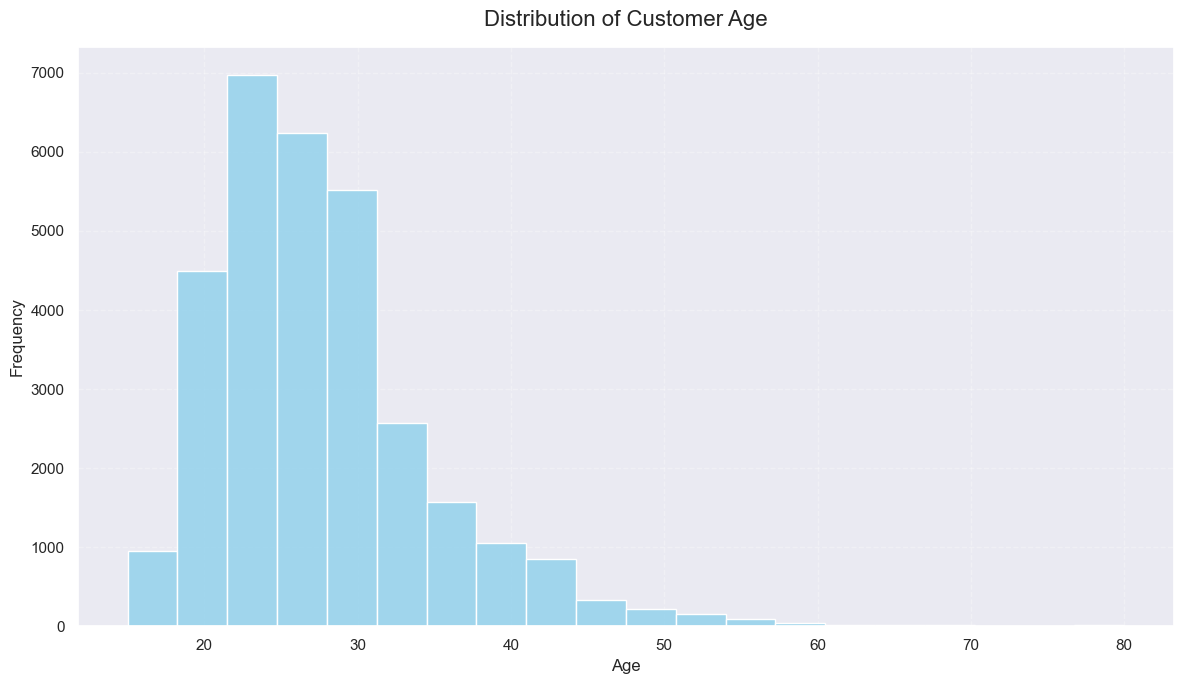

In [26]:
# Set figure size
plt.figure(figsize=(12, 7))

# Create simple histogram
sns.histplot(data=df['customer_age'].dropna(), 
            bins=20,
            color='skyblue',
            edgecolor='white')

# Customize the plot
plt.title('Distribution of Customer Age', 
          fontsize=16, 
          pad=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')

# Adjust layout
plt.tight_layout()

plt.show()

Given the age distribution, and because we have a peak around age 22-25, a long right tail extending towards higher ages and that most customers concentrated between 20-40 years old.
We to fill the missing values with the median. Since it's:
* It's less sensitive to the right skew in your data than the mean
* The mean would be pulled higher by the long right tail, potentially overestimating typical customer ages
* The mode (around age 22-25) might underestimate ages for older customers, as there's still substantial density across other age groups

In [27]:
df['customer_age'] = df['customer_age'].fillna(df['customer_age'].median())

In [28]:
def categorize_age(age):
    if age <= 17:
        return 16  # Midpoint of 'Minors' (Assuming 15 is the lowest value))
    elif 18 <= age <= 33:
        return 25.5  # Midpoint of 'Young Adults'
    elif 34 <= age <= 49:
        return 41.5  # Midpoint of 'Middle-Adults'
    elif 50 <= age <= 65:
        return 57.5  # Midpoint of 'Older Adults'
    elif age >= 66:
        return 75.5  # Midpoint of 'Seniors (assuming 80 is the highest value)

# Apply the function to create the 'age_category' column
df['age_category'] = df['customer_age'].apply(categorize_age)
new_features.append('age_category')

In [29]:
df["customer_age"].isna().sum()

0

Now we have the ages divided by:
* Minors (16)
* Young Adults (25.5)
* Middle-Adults (41.5)
* Older Adults (57.5)
* Seniors (75.5)

#### Vendor Count ####

In [30]:
df["vendor_count"].value_counts().sort_index()

vendor_count
0      138
1     9059
2     8547
3     5173
4     2984
5     1875
6     1166
7      816
8      594
9      396
10     285
11     219
12     146
13     108
14     101
15      62
16      41
17      34
18      26
19      20
20      22
21       9
22       7
23      12
24       6
25       6
26       2
27       5
28       3
29       2
30       3
31       1
32       2
34       2
35       1
40       1
41       1
Name: count, dtype: int64

Since the Vendor Count is "Number of unique vendors the customer has ordered from", we can only assume that the customer with value 0 haven't made any order yet. But we'll check that later.

#### Product Count ####

In [31]:
df["product_count"].isna().sum()

0

In [32]:
df[df["product_count"] == 0].shape[0]

156

In [33]:
df[df["product_count"] < 0].shape[0]

0

This means that are 156 customers, registed in the service that haven't made any order yet. Let's check if those are the same with the vendor_count=0

In [34]:
df[(df["product_count"] == 0) & (df["vendor_count"] == 0)].shape[0]

138

Since the number of customers with 0 vendor_count and 0 product_count is the same, we can conclude that these customers haven't made any order yet. But now this means that the other 18 customers that haven't made any order, should have the same vendor_count and product_count. So we need to replace them with the same value.

In [35]:
df.loc[(df["product_count"] == 0) & (df["vendor_count"] != 0), "vendor_count"] = df["product_count"]

In [36]:
#Veryfing that it works
df[(df["product_count"] == 0) & (df["vendor_count"] == 0)].shape[0]

156

#### Is Chain ####

In [37]:
df["is_chain"].value_counts().sort_index()

is_chain
0     6099
1     8543
2     5892
3     3696
4     2165
5     1380
6      946
7      679
8      500
9      373
10     291
11     248
12     169
13     152
14     138
15      89
16      68
17      55
18      65
19      35
20      34
21      29
22      26
23      20
24      23
25      14
26      20
27      16
28      13
29      10
30       9
31       9
32       8
33       6
34       6
35       4
36       5
37       4
38       1
39       2
40       5
42       2
43       5
44       1
45       4
46       1
47       1
48       2
49       1
54       1
56       1
61       1
63       1
65       1
67       1
73       1
75       1
80       1
81       1
83       1
Name: count, dtype: int64

We we're expecting to see a binomial type of variable (0 if the customer didn't ordered from a chain and 1 if the customer did ordered from a chain). Since that is not the case, we need to explore the values. To do that, we are going to see the distribution of this feature.

C:\Users\migue\AppData\Local\Temp\ipykernel_17104\3116038138.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=large_freq.index, y=large_freq.values, palette="viridis")


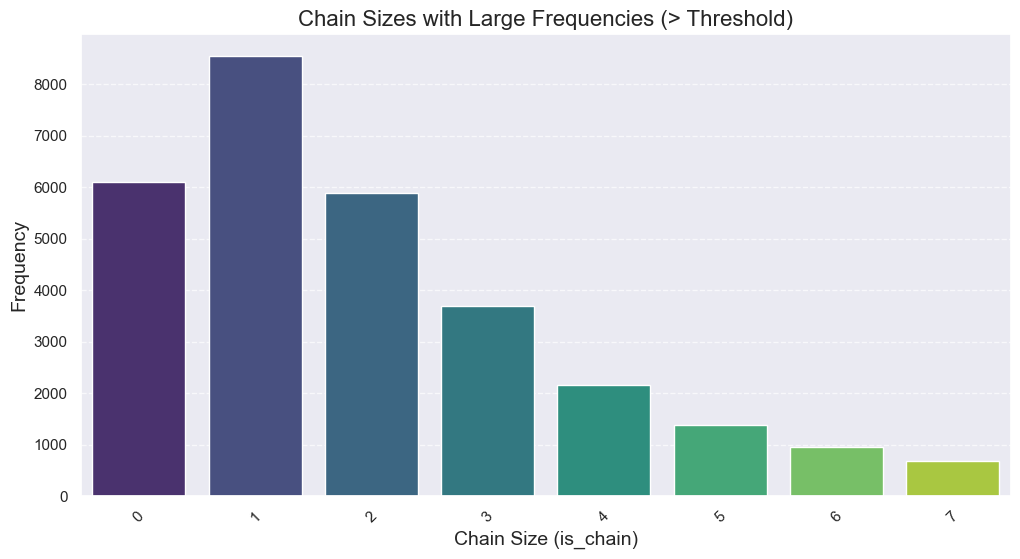

C:\Users\migue\AppData\Local\Temp\ipykernel_17104\3116038138.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=small_freq.index, y=small_freq.values, palette="magma")


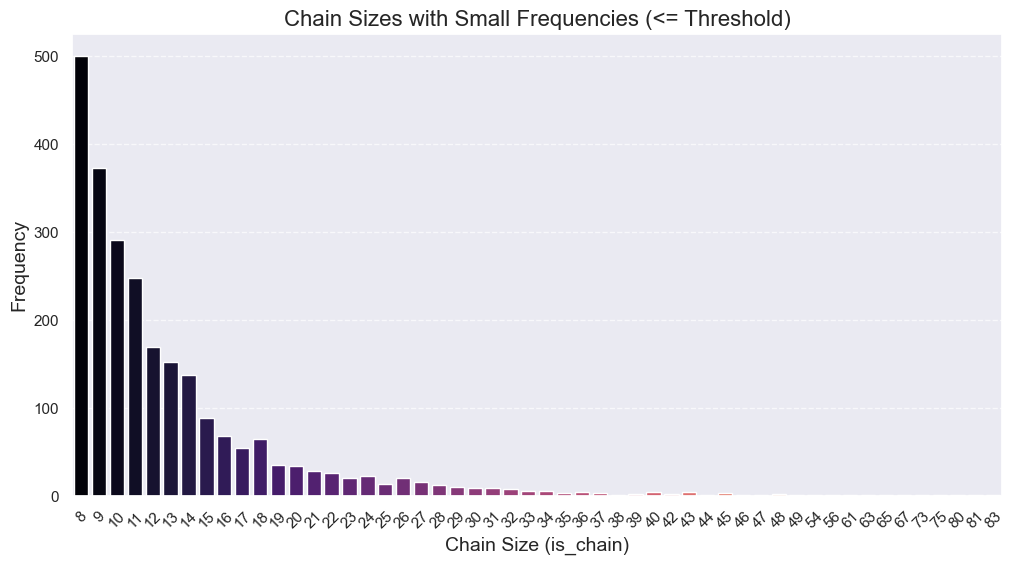

In [38]:
# Split into two groups: large and small frequencies
threshold = 500  # Define a threshold for splitting
large_freq = df["is_chain"].value_counts()[df["is_chain"].value_counts() > threshold]
small_freq = df["is_chain"].value_counts()[df["is_chain"].value_counts() <= threshold]

# Plot large frequencies
plt.figure(figsize=(12, 6))
sns.barplot(x=large_freq.index, y=large_freq.values, palette="viridis")
plt.title("Chain Sizes with Large Frequencies (> Threshold)", fontsize=16)
plt.xlabel("Chain Size (is_chain)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Plot small frequencies
plt.figure(figsize=(12, 6))
sns.barplot(x=small_freq.index, y=small_freq.values, palette="magma")
plt.title("Chain Sizes with Small Frequencies (<= Threshold)", fontsize=16)
plt.xlabel("Chain Size (is_chain)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

It looks that this feature can also be used to observe the type of chain. Assuming that higher chains would probably have higher frequency values, we can divide the chains into different categories. So that for each customer we will know if the customer orders from a chain, and if he does, from which type.

In [39]:

chain_frequencies = df['is_chain'].value_counts().to_dict()
df["chain_frequency"] = df["is_chain"].map(chain_frequencies)

# Step 3: Define a function to categorize chains
def categorize_chain(row):
    if row["is_chain"] == 0:
        return "Non-Chain"
    elif row["chain_frequency"] > 500:
        return "Large Chain"
    elif 100 <= row["chain_frequency"] <= 500:
        return "Medium Chain"
    elif row["chain_frequency"] < 100:
        return "Small Chain"
    else:
        return "Non Chain"
    
df["chain_category"] = df.apply(categorize_chain, axis=1)
new_features.append('chain_category')

In [40]:
#We can also drop chain frequency since it would not be useful
df.drop(columns=['chain_frequency'], inplace=True)

In [41]:
df["chain_category"].value_counts()

chain_category
Large Chain     23301
Non-Chain        6099
Medium Chain     1871
Small Chain       604
Name: count, dtype: int64

#### First Order ####

In [42]:
df["first_order"].isna().sum()

106

Let's start by analyzing the cases where the first order has a missing value, and which variable can explain it

In [43]:
no_orders = df[df['first_order'].isna() & (df['last_order'] == 0)]

# Display the relevant columns
print(no_orders[['first_order', 'last_order', 'product_count']])

             first_order  last_order  product_count
customer_id                                        
0366fbb035           NaN           0              1
039d7c8a20           NaN           0              1
04c9d25c93           NaN           0              1
09118ae9e7           NaN           0              1
0d1f298bbd           NaN           0              1
...                  ...         ...            ...
f4e366c281           NaN           0              1
f6b6709018           NaN           0              1
f74ad8ce3f           NaN           0              1
f7b19c0241           NaN           0              1
fd40d3b0e0           NaN           0              1

[106 rows x 3 columns]


In [44]:
orders = df[(df['product_count']==1)]

# Display the relevant columns
print(orders[['first_order', 'last_order', 'product_count']])

             first_order  last_order  product_count
customer_id                                        
0d18e5416b           1.0           1              1
10e5701adb           1.0           1              1
1415578e02           1.0           1              1
1d02e614b4           1.0           1              1
237e4e7aaf           1.0           1              1
...                  ...         ...            ...
f4e366c281           NaN           0              1
f6b6709018           NaN           0              1
f74ad8ce3f           NaN           0              1
f7b19c0241           NaN           0              1
fd40d3b0e0           NaN           0              1

[4690 rows x 3 columns]


This tells us that there are 2 scenarios:
* The first order was placed after the start of the dataset, so the of first order and last order value is equal to 1.
* The first order was placed before the start of the dataset, so the of first order and last order should be equal to 0. *

Now we need to switch the NaN values to 0 according to our findings, and the switch the variable datatype

In [45]:
df['first_order'] = df['first_order'].fillna(0)

In [46]:
df['first_order'] = df['first_order'].astype(int)

#### Last Order ####

In [47]:
df["last_order"].isna().sum()

0

In [48]:
df["last_order"].value_counts().sort_index()

last_order
0      106
1       56
2       64
3       85
4       78
      ... 
86    1046
87    1176
88    1438
89    1711
90      32
Name: count, Length: 91, dtype: int64

The difference between the last order and the first order, can be useful to take conclusions about the activity of the customer in the service 

In [49]:
#Creating a column that stores the calculation of days since the first order
df['engagement_duration'] = df['last_order'] - df['first_order']
new_features.append('engagement_duration')

In [50]:
#DAMOS DROP A ISTO?????

df['avg_order_frequency'] = df['product_count'] / df['engagement_duration']
new_features.append('avg_order_frequency')

#### Last Promo ####

In [51]:
df["last_promo"].value_counts()

last_promo
-           16744
DELIVERY     6282
DISCOUNT     4496
FREEBIE      4353
Name: count, dtype: int64

In [52]:
df['last_promo'] = df['last_promo'].replace("-", "No promo")

#### Payment Method ####

In [53]:
#visualizing the available payment methods
df['payment_method'].unique()

array(['DIGI', 'CASH', 'CARD'], dtype=object)

#### CUI_American, CUI_Asian, CUI_Chinese, CUI_Italian, etc. ####

We are going to create a feature that store the total amount of money spent in every cuisine type

In [54]:
cui_columns = [col for col in df.columns if col.startswith('CUI')]
df['tot_value_cui'] = df[cui_columns].sum(axis=1)
new_features.append('tot_value_cui')

#### DOW_0 to DOW_6 ####

In [55]:
df['preferred_order_day'] = df[[f'DOW_{i}' for i in range(7)]].idxmax(axis=1).str.replace('DOW_', '').astype(int)

new_features.append('preferred_order_day')

#### HR_0 to HR_23 ####


In [56]:
df["HR_0"].isna().sum()

1164

Since the number of orders should be the same if we sum all the DOW and HR. Let's start by checking that, for a random customer without any missing value in the HR_0

In [57]:
# Select a customer without missing values in the HR columns
customer_id = df[df[[f'HR_{i}' for i in range(24)]].notnull().all(axis=1)].iloc[0]['customer_id']

# Sum the DOW columns for that customer
dow_sum = df[df['customer_id'] == customer_id][[f'DOW_{i}' for i in range(7)]].sum(axis=1).values[0]

# Sum the HR columns for that customer
hr_sum = df[df['customer_id'] == customer_id][[f'HR_{i}' for i in range(24)]].sum(axis=1).values[0]

# Check if the sums are equal
print(f"Customer ID: {customer_id}")
print(f"Sum of DOW columns: {dow_sum}")
print(f"Sum of HR columns: {hr_sum}")

if dow_sum == hr_sum:
    print("The sum of DOW and HR columns are equal.")
else:
    print("The sum of DOW and HR columns are NOT equal.")

Customer ID: 1b8f824d5e
Sum of DOW columns: 2
Sum of HR columns: 2.0
The sum of DOW and HR columns are equal.


It makes sense. So we are going to fill the missing data with the substration of the total number of orders and the HR orders that have values (using the DOW)

In [58]:
# Loop over each customer and fill missing HR_0 values
for customer_id in df['customer_id'].unique():
    # Get the row for the current customer
    customer_data = df[df['customer_id'] == customer_id]
    
    # Skip customers where HR_0 is not missing
    if not pd.isnull(customer_data['HR_0'].values[0]):
        continue
    
    # Calculate the total number of orders from DOW columns
    total_orders = customer_data[[f'DOW_{i}' for i in range(7)]].sum(axis=1).values[0]
    
    # Calculate the sum of orders in HR_1 to HR_23
    hr_orders = customer_data[[f'HR_{i}' for i in range(1, 24)]].sum(axis=1).values[0]
    
    # Calculate the missing HR_0 value
    missing_hr_0 = total_orders - hr_orders
    
    # Fill the missing value in HR_0
    df.loc[df['customer_id'] == customer_id, 'HR_0'] = missing_hr_0

# Check the result for some customers
print(df[['customer_id', 'HR_0']].head())

            customer_id  HR_0
customer_id                  
1b8f824d5e   1b8f824d5e   0.0
5d272b9dcb   5d272b9dcb   0.0
f6d1b2ba63   f6d1b2ba63   0.0
180c632ed8   180c632ed8   0.0
4eb37a6705   4eb37a6705   0.0


In [59]:
df['preferred_order_hour'] = df[[f'HR_{i}' for i in range(24)]].idxmax(axis=1).str.replace('HR_', '').astype(int)
new_features.append('preferred_order_hour')

#### Checking missing values after preprocessing ####

In [60]:
# Create a DataFrame showing only the columns with missing values
missing_values = df.isna().sum()

# Filter the missing values to display only the columns with missing data
missing_values = missing_values[missing_values > 0]

# Display the missing values
print(missing_values)


avg_order_frequency    156
dtype: int64


We'll stick with these missing values because:
* ``avg_order_frequency`` is related to the values were the denominator is zero

In [61]:
df[new_features].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_city,31875,3,2,10757,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_category,31875.0,NaN,NaN,NaN,28.219639,6.909384,16.0,25.5,25.5,25.5,75.5
chain_category,31875,4,Large Chain,23301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engagement_duration,31875.0,NaN,NaN,NaN,35.297129,29.43741,0.0,3.0,34.0,62.0,90.0
avg_order_frequency,31719.0,NaN,NaN,NaN,inf,NaN,0.022727,0.096774,0.179487,1.0,inf
tot_value_cui,31875.0,NaN,NaN,NaN,38.295857,46.410657,0.0,12.88,24.14,44.97,1418.33
preferred_order_day,31875.0,NaN,NaN,NaN,2.67291,2.032812,0.0,1.0,3.0,4.0,6.0
preferred_order_hour,31875.0,NaN,NaN,NaN,11.487122,5.38818,0.0,8.0,12.0,16.0,23.0


In [62]:
#Saving df 
df.to_csv('Processed_Data.csv', index=False)


### **4.** New Features ###
**This topic was created to help us improve our analysis by creating new 7 features**

#### 4.1 Creating New Features ####

#### 4.1.1 Money Spent by Costumer ####

#### 4.1.2 Order Duration ####

#### 4.1.3 Order Frequency ####

#### 4.1.4 Prefered Time of the Day ####

#### 4.1.5 Preferred Day of the Week ####

#### 4.1.6 Age Group ####

#### 4.1.7 Cities ####

### 4.2 New Features Statistics ###

### **5.** Visualisations ###

##### Visualizations helps us transforming complex data into clear insights, enabling us to uncover patterns and communicate findings effectively.  #####

### 5.1 Region and cities ###

#### 5.1.1 Costumer per city distribution (Graph 1) ####

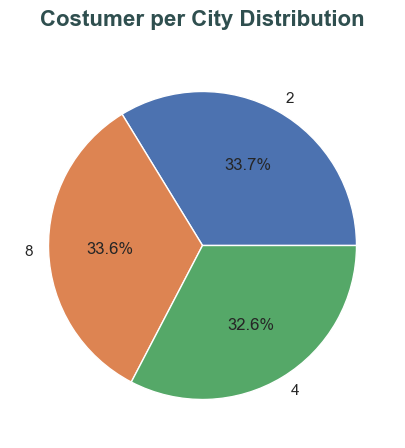

In [62]:
city_count = df['customer_city'].value_counts()
city_percentage = city_count / city_count.sum() * 100

plt.figure(figsize=(10,5))
plt.pie(city_percentage, labels = city_percentage.index, autopct='%1.1f%%')
plt.title("Costumer per City Distribution", fontsize=16, fontweight='bold', color='darkslategray', pad=20)
plt.show()

#### 5.1.2 Total orders by city (Graph 2) ####

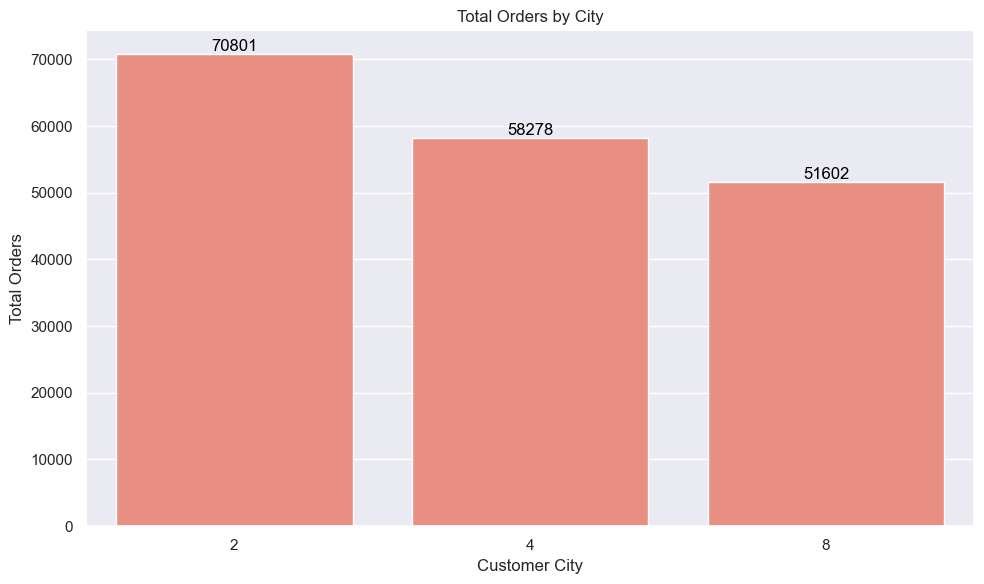

In [63]:
total_orders = df.groupby('customer_city')['product_count'].sum().reset_index(name='total_orders')

plt.figure(figsize=(10, 6))
sns.barplot(data=total_orders, x='customer_city', y='total_orders', color='salmon')
plt.title('Total Orders by City')
plt.xlabel('Customer City')
plt.ylabel('Total Orders')

for index, row in total_orders.iterrows():
    plt.text(index, row['total_orders'], row['total_orders'], color='black', ha='center', va='bottom')
    
plt.tight_layout()
plt.show()


#### 5.1.3 Money spent by city (Graph 3) ####

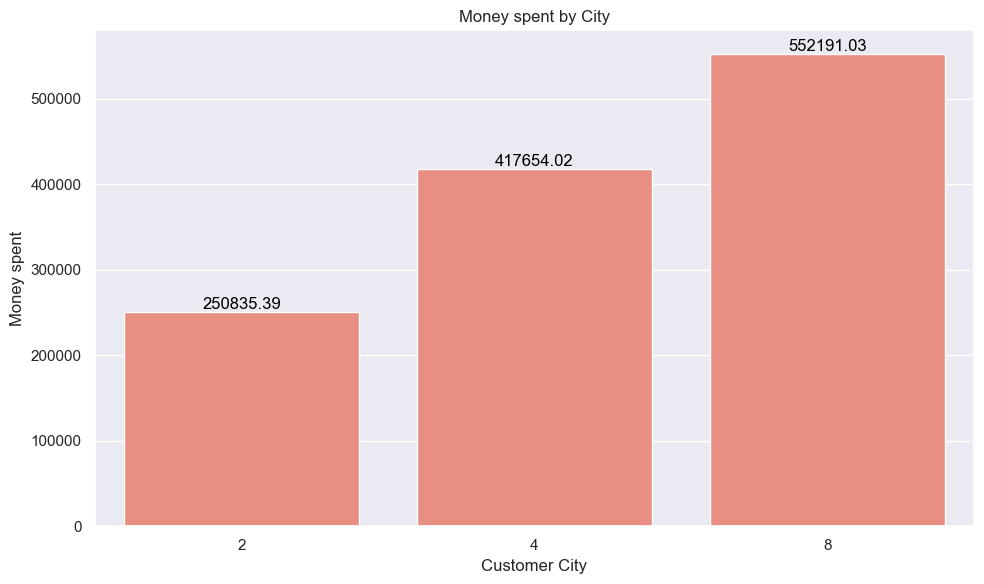

In [64]:
money_spent = df.groupby('customer_city')['tot_value_cui'].sum().reset_index(name='money_spent')

plt.figure(figsize=(10, 6))
sns.barplot(data=money_spent, x='customer_city', y='money_spent', color='salmon')
plt.title('Money spent by City')
plt.xlabel('Customer City')
plt.ylabel('Money spent')

for index, row in money_spent.iterrows():
    plt.text(index, row['money_spent'], row['money_spent'], color='black', ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

#### 5.2 Prefered Cuisine Types ####

##### 5.2.1 Orders by Cuisine Type (Graph 4) ####

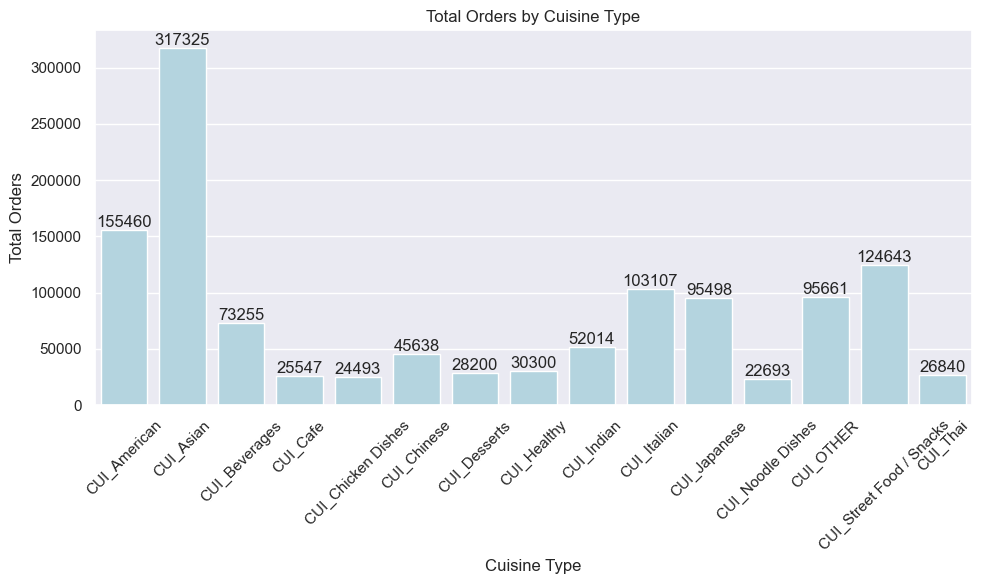

In [65]:
cuisine_columns = ['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 
                   'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 
                   'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 
                   'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 
                   'CUI_Street Food / Snacks', 'CUI_Thai']

#creating a dataframe with the sum of orders by cuisine type 
total_cuisines = df[cuisine_columns].sum().reset_index()
total_cuisines.columns = ['Cuisine Type', 'Total Orders']
plt.figure(figsize=(10, 6))
sns.barplot(data=total_cuisines, x='Cuisine Type', y='Total Orders', color='lightblue')
plt.title('Total Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Total Orders')
plt.xticks(rotation=45) 

for index, row in total_cuisines.iterrows():
    plt.text(index, row['Total Orders'], int(row['Total Orders']), ha='center', va='bottom')

plt.tight_layout()
plt.show()


##### 5.2.2 Cuisine Preferences by city (Graph 5) ####

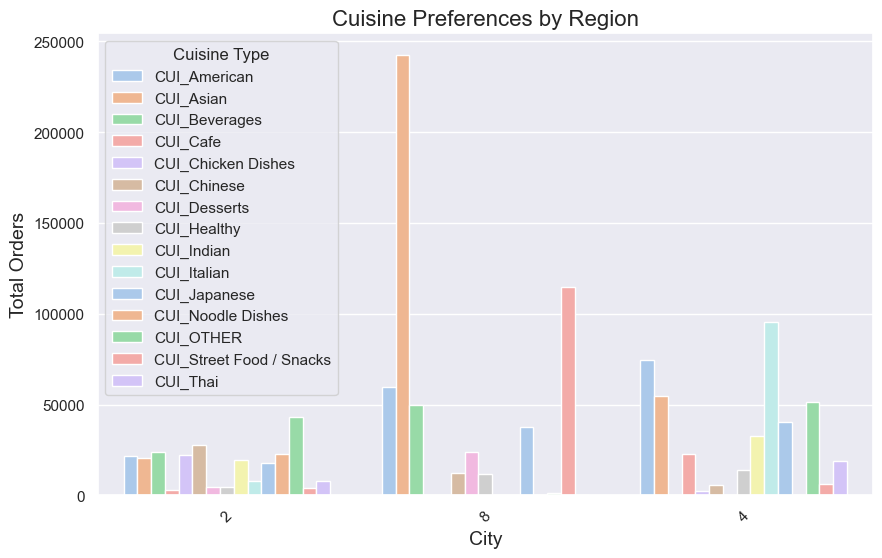

In [66]:
#sum of the orders per region per type of cuisine 
cui_columns = [col for col in df.columns if col.startswith('CUI')]
cuisine_counts = df[cui_columns].sum().reset_index()
cuisine_counts.columns = ['Cuisine Type', 'Count']

region_cuisine = pd.DataFrame()

for region in df['customer_city'].unique():
    region_data = df[df['customer_city'] == region][cui_columns].sum().reset_index()
    region_data.columns = ['Cuisine Type', 'Count']
    region_data['Region'] = region
    region_cuisine = pd.concat([region_cuisine, region_data], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=region_cuisine, x='Region', y='Count', hue='Cuisine Type', palette='pastel')

plt.title('Cuisine Preferences by Region', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Total Orders', fontsize=14)
plt.xticks(rotation=45)

plt.legend(title='Cuisine Type')
plt.show()

##### 5.2.3 Biggest order and total value spent by Cuisine Type (Graph 6) ####

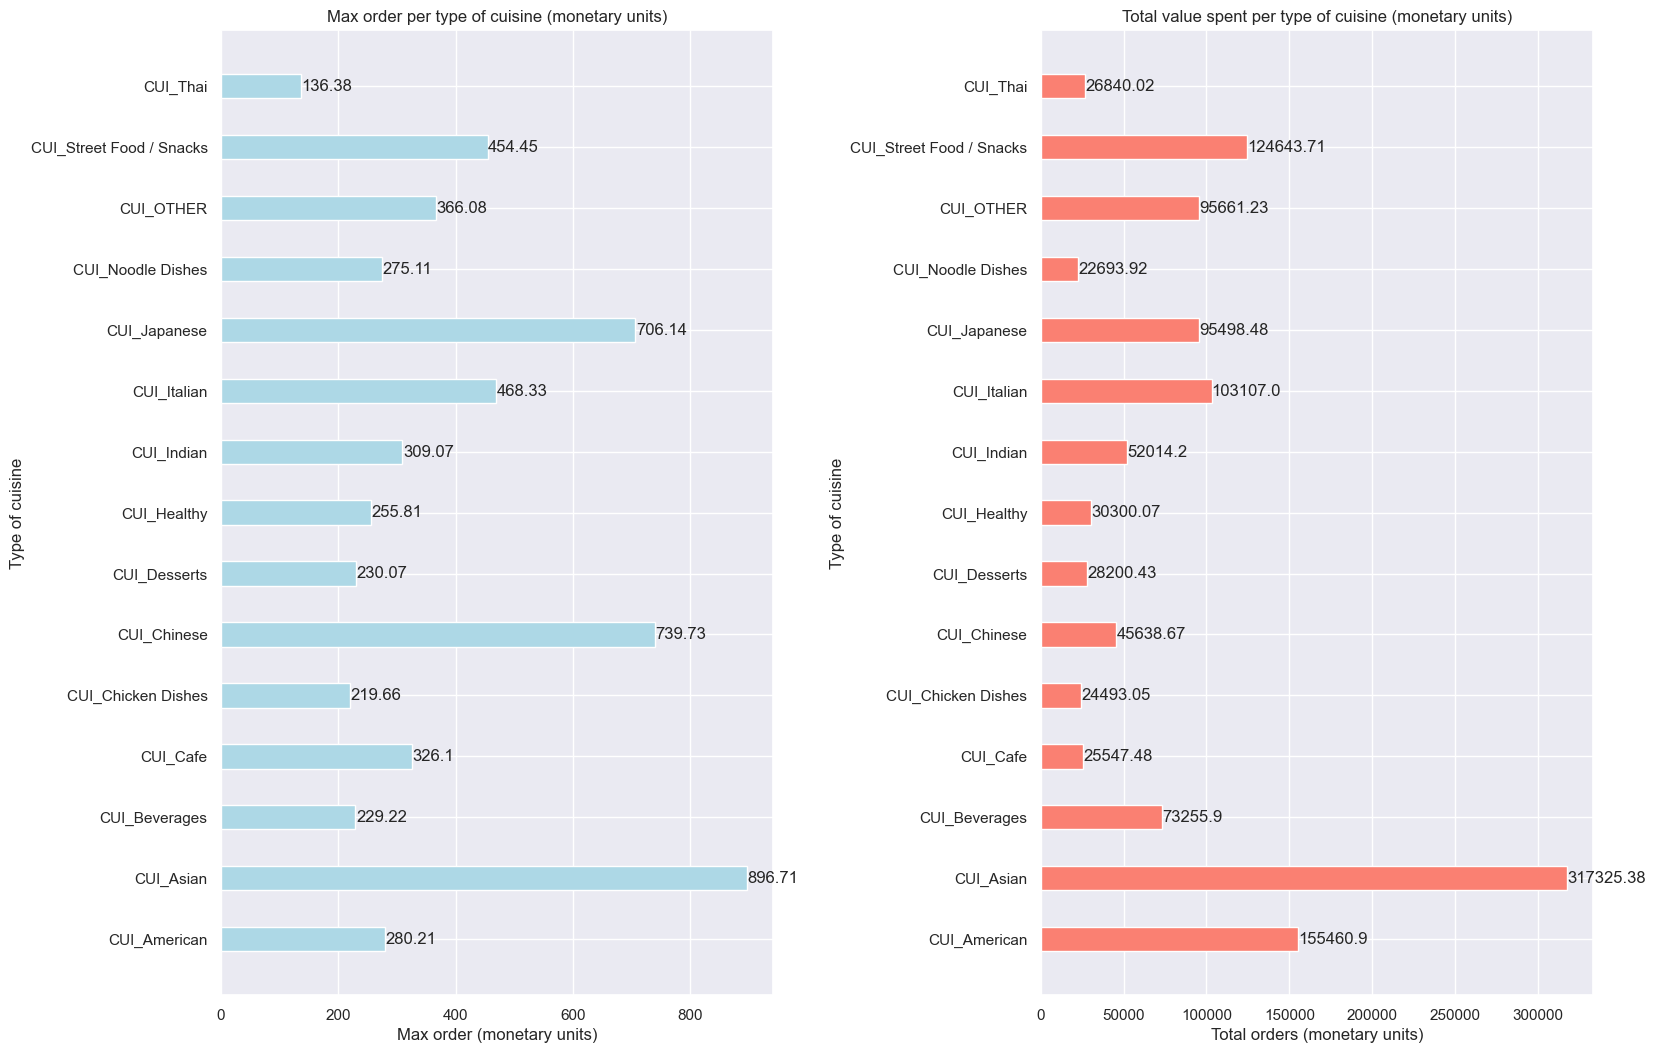

In [67]:
max_values = df[cui_columns].max()
sum_values = df[cui_columns].sum().round(2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 11))

#graph of the bigger order per cuisine type 
axes[0].barh(max_values.index, max_values.values, color='lightblue', height=0.4)
axes[0].set_title('Max order per type of cuisine (monetary units)')
axes[0].set_xlabel('Max order (monetary units)')
axes[0].set_ylabel('Type of cuisine')
for i in range(len(max_values)):
    axes[0].text(max_values.values[i] + 1, i, str(max_values.values[i]), va='center', fontsize=12)

#graph of the total value in monetary units of the cuisine type 
axes[1].barh(sum_values.index, sum_values.values, color='salmon', height=0.4)
axes[1].set_title('Total value spent per type of cuisine (monetary units)')
axes[1].set_xlabel('Total orders (monetary units)')
axes[1].set_ylabel('Type of cuisine')
for i in range(len(sum_values)):
    axes[1].text(sum_values.values[i] + 1, i, str(sum_values.values[i]),va='center', fontsize=12)

plt.tight_layout(pad=2.0)
plt.show()

#### 5.3 Preferred Days and Hours ####


##### 5.3.1 Total Number of Orders by Day of the Week (Graph 7) ####

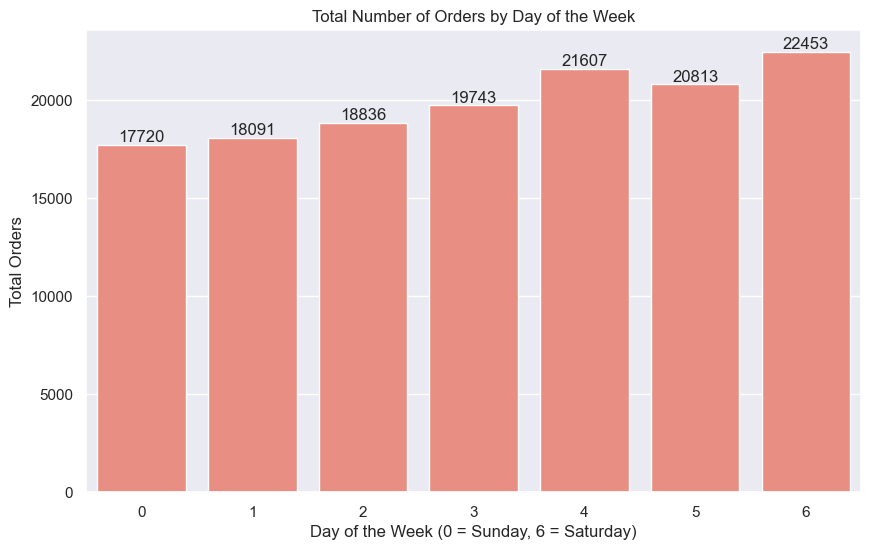

In [68]:
weekly_columns = [f'DOW_{i}' for i in range(7)]

weekly_totals = df[weekly_columns].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_totals.index.str.replace("DOW_", ""), y=weekly_totals.values, color="salmon")

plt.title('Total Number of Orders by Day of the Week')
plt.xlabel('Day of the Week (0 = Sunday, 6 = Saturday)')
plt.ylabel('Total Orders')

for index, value in enumerate(weekly_totals.values):
    plt.text(index, value, f'{int(value)}', ha='center', va='bottom')
plt.show()


##### 5.3.2 Average Orders: weekends and weekdays (Graph 8) ####

   Category   Orders
0  Weekdays  19818.0
1  Weekends  20086.5


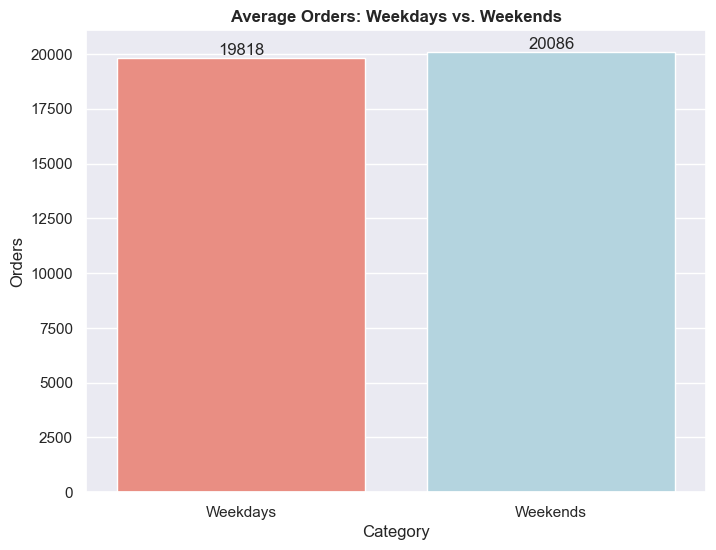

In [69]:

weekday_columns = ['DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5']
weekend_columns = ['DOW_0', 'DOW_6']
weekday_orders = df[weekday_columns].sum().sum() 
weekend_orders = df[weekend_columns].sum().sum() 


labels = ['Weekdays', 'Weekends']
sizes = [weekday_orders/5, weekend_orders/2]
colors = ['seagreen', 'peru']

orders_data = {'Category': labels, 'Orders': sizes}

DOW_orders_df = pd.DataFrame(orders_data)
print(DOW_orders_df)

plt.figure(figsize=(8,6))
sns.barplot(x='Category', y='Orders', data=DOW_orders_df, hue='Category', palette=['salmon', 'lightblue'], legend=False)
plt.title('Average Orders: Weekdays vs. Weekends', fontweight='bold')
plt.ylabel('Orders')
plt.xlabel('Category')

for index, row in DOW_orders_df.iterrows():
    plt.text(index, row['Orders'], int(row['Orders']), ha='center', va='bottom')

plt.show()


##### 5.3.3 Number of Orders by Hour (Graph 9) ####

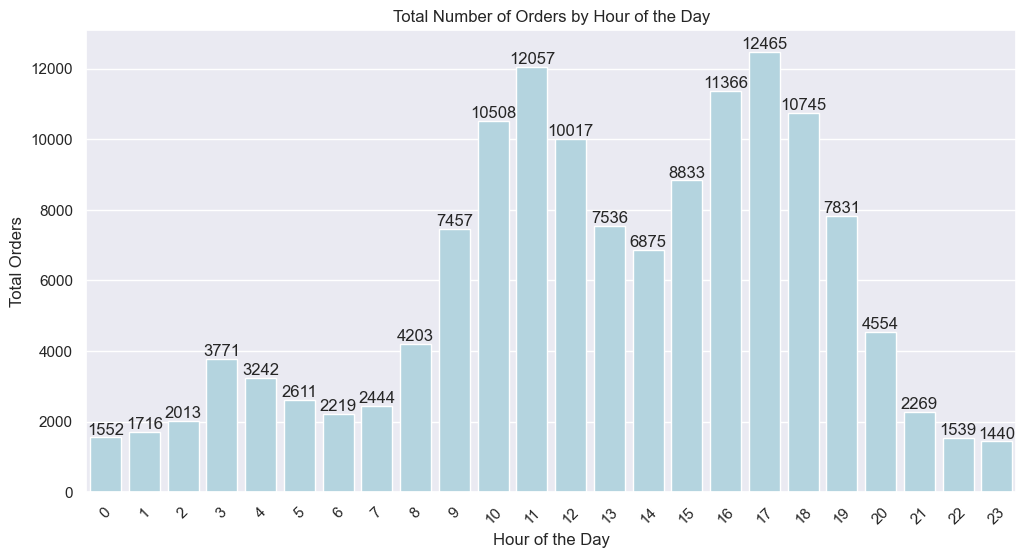

In [70]:

hourly_columns = [f'HR_{i}' for i in range(24)]

hourly_totals = df[hourly_columns].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_totals.index.str.replace("HR_", ""), y=hourly_totals.values, color="lightblue")

plt.title('Total Number of Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)

for index, value in enumerate(hourly_totals.values):
    plt.text(index, value, int(value), ha='center', va='bottom')

plt.show()


#### 5.4 Age of the customers ####

##### 5.4.1 Customer Age distribution (Graph 10) ####

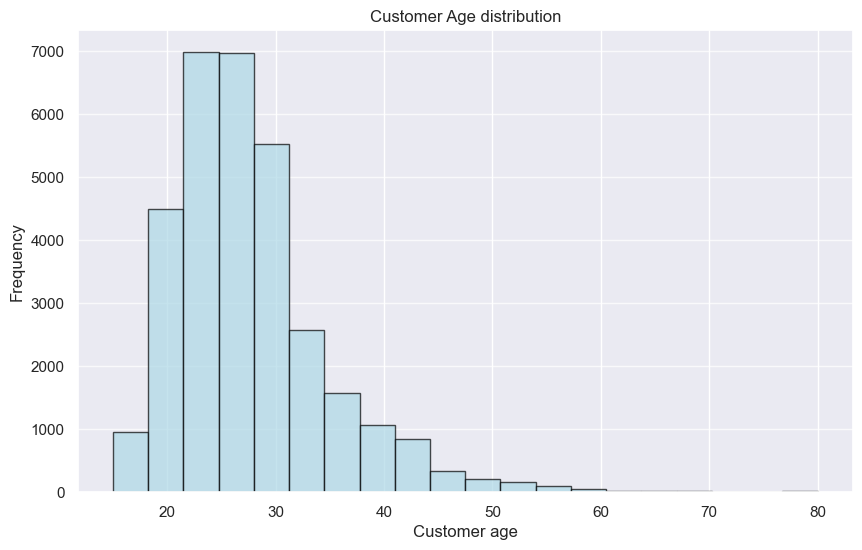

In [71]:
plt.figure(figsize=(10, 6))
plt.hist(df['customer_age'], bins=20, color='lightblue', edgecolor='black', alpha=0.7)
plt.title('Customer Age distribution')
plt.xlabel('Customer age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


##### 5.4.2 Box plot of customer age (Graph 11) ####

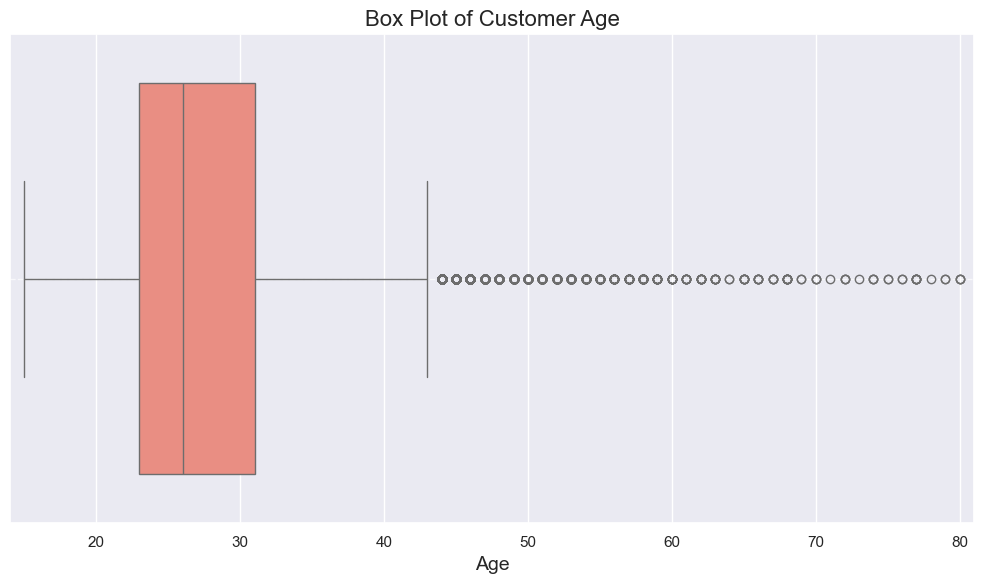

In [72]:
if df.index.has_duplicates:
    df = df.reset_index(drop=True)

plt.figure(figsize=(10, 6)) 
sns.boxplot(x=df['customer_age'], color='salmon')
plt.title('Box Plot of Customer Age', fontsize=16)
plt.xlabel('Age', fontsize=14)

# add lines 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(df['customer_age'].min() - 1, df['customer_age'].max() + 1)  
plt.tight_layout()
plt.show()

##### 5.4.3 Average value spending by age category (Graph 12) ####

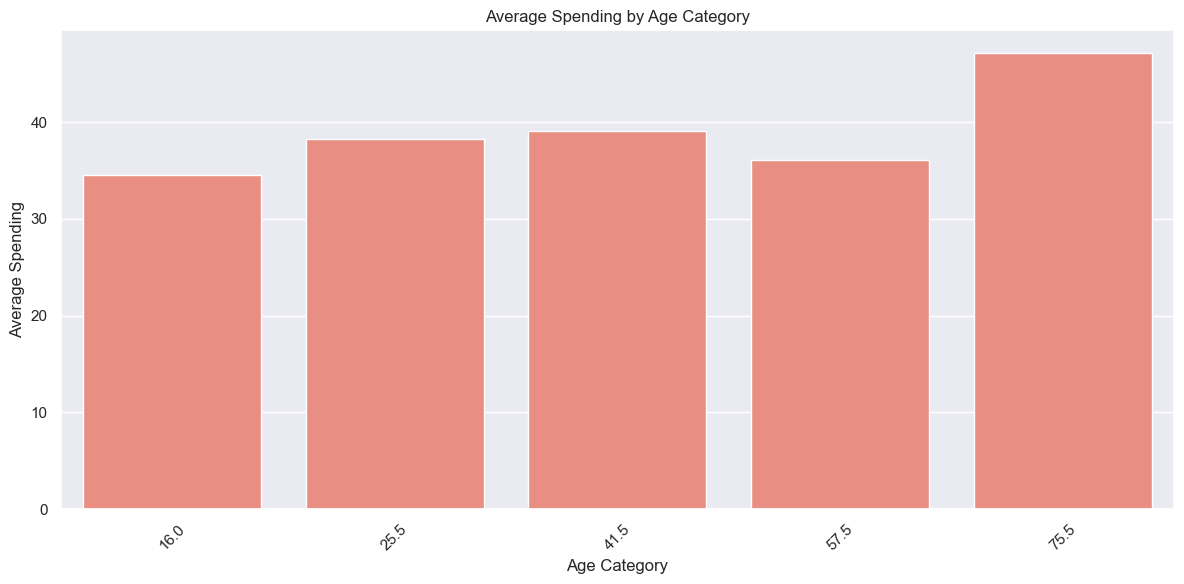

In [73]:

mean_spending = df.groupby('age_category')['tot_value_cui'].mean().reset_index()

plt.figure(figsize=(12, 6)) 
sns.barplot(data=mean_spending, x='age_category', y='tot_value_cui', color='salmon')
plt.title('Average Spending by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Average Spending')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


##### 5.5 Top 10 customers by total money spent (Graph 13) ####

/var/folders/8v/1qhsx6xs4ts98l6wng3p3dy00000gn/T/ipykernel_6666/2457345382.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers,  x='customer_id',y='tot_value_cui', palette=palette)


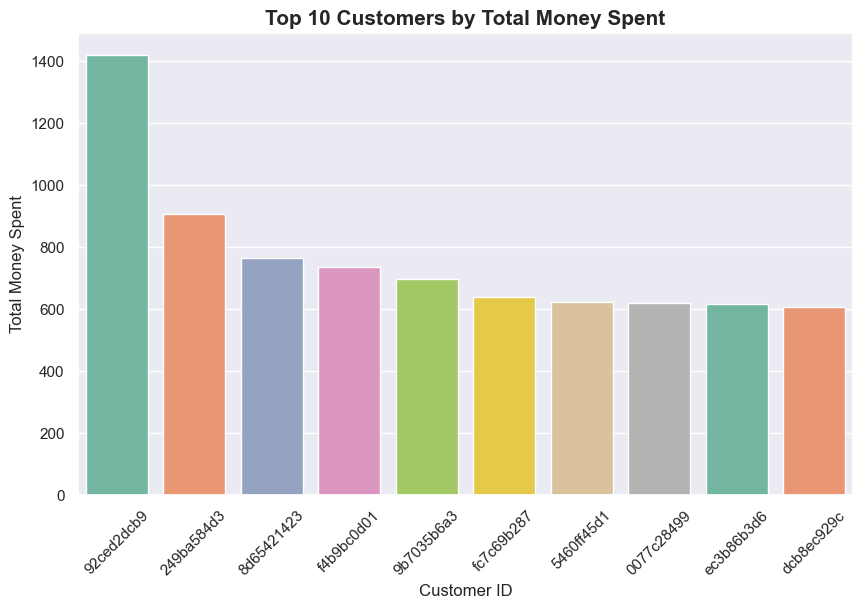

In [74]:
top_customers = df.sort_values(by='tot_value_cui', ascending=False).head(10)
palette = sns.color_palette("Set2", n_colors=10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers,  x='customer_id',y='tot_value_cui', palette=palette)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Money Spent', fontsize=12)
plt.title('Top 10 Customers by Total Money Spent', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

##### 5.6 Promotion distribution (Graph 14) ####

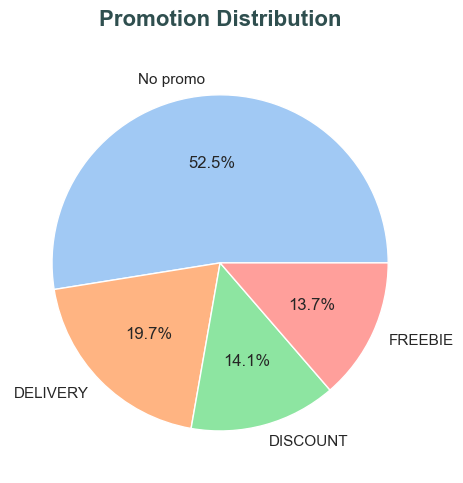

In [75]:
# Configuring the pie chart with labels and highlighting the most relevant slice
colors = sns.color_palette("pastel")

plt.figure(figsize=(10, 5))  # Setting figure size
plt.pie(df.last_promo.value_counts(), 
        labels=df.last_promo.value_counts().index,  # Labels for each slice
        autopct='%1.1f%%', # Percentages on each slice
        colors = colors) 

plt.title("Promotion Distribution", fontsize=16, fontweight='bold', color='darkslategray', pad=20)
plt.tight_layout()
plt.show()

##### 5.7 Average value spending by age category (Graph 15) ####

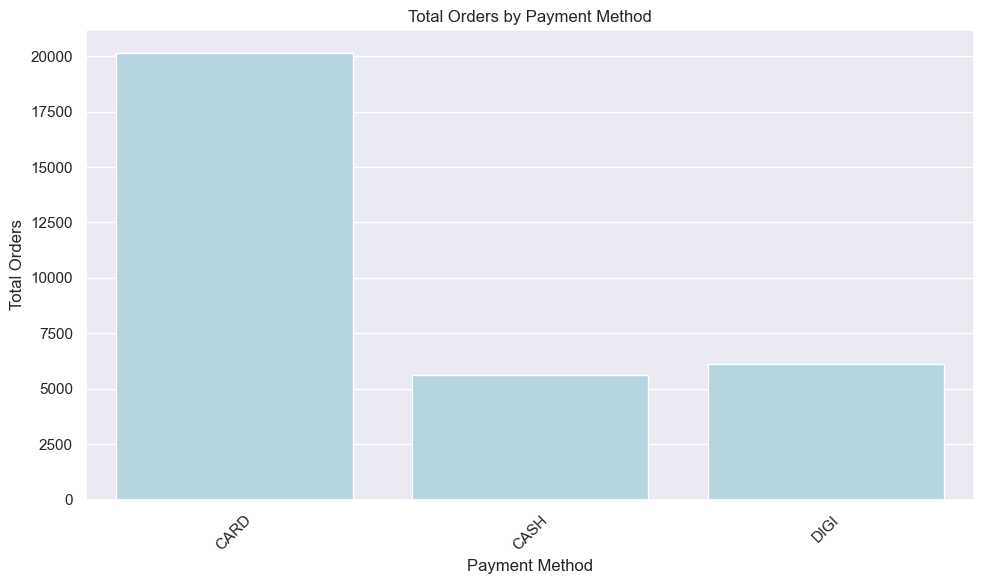

In [76]:
total_orders = df.groupby('payment_method').size().reset_index(name='total_orders')

plt.figure(figsize=(10, 6))
sns.barplot(data=total_orders, x='payment_method', y='total_orders', color='lightblue')
plt.title('Total Orders by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



### 5.8 Relations between important features ###

#### 5.8.1 Customer age per city (Graph 16) ####

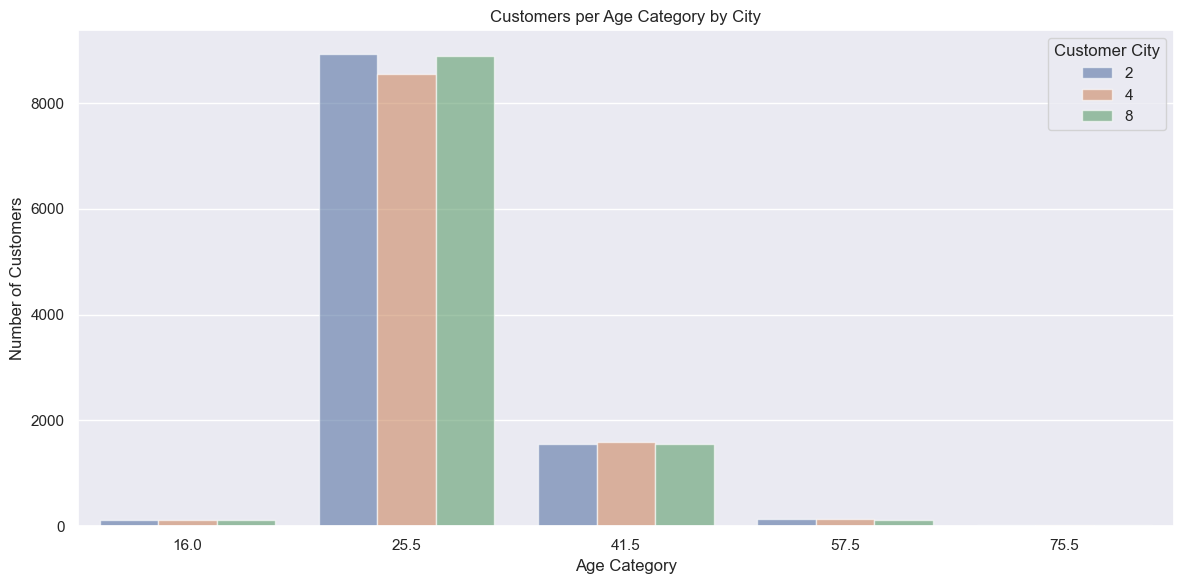

In [77]:
age_city_count = df.groupby(['age_category', 'customer_city']).size().reset_index(name='customer_count')

plt.figure(figsize=(12, 6))
sns.barplot(data=age_city_count, x='age_category', y='customer_count', hue='customer_city', alpha=0.6)
plt.title('Customers per Age Category by City')
plt.xlabel('Age Category')
plt.ylabel('Number of Customers')
plt.legend(title='Customer City')

plt.tight_layout()
plt.show()

#### 5.8.2 Correlation between number of vendedors ordered from, products ordered and orders per weekday (Graph 17) ####

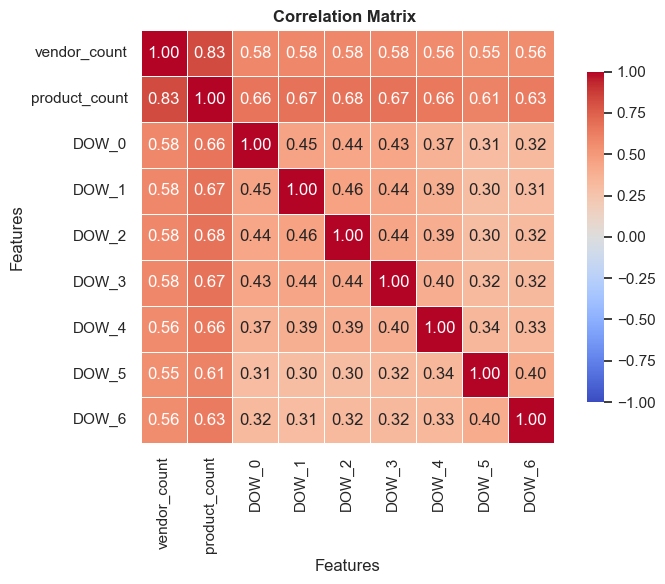

In [78]:

correlation_columns = ['vendor_count','product_count','DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']

# Calculate the correlation matrix
correlation_matrix = df[correlation_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=.5, vmin=-1, vmax=1, center=0)

# Title and labels
plt.title('Correlation Matrix ', fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the heatmap
plt.tight_layout()
plt.show()



#### 5.8.3 Correlation between total money spent, order frequency, preferred order hour and preferred order day (Graph 18) ####

In [79]:

correlation_columns = ['tot_value_cui', 'order_frequency', 'preferred_order_hour', 'preferred_order_day']

# Calculate the correlation matrix
correlation_matrix = df[correlation_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=.5, vmin=-1, vmax=1, center=0)

# Title and labels
plt.title('Correlation Matrix ', fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the heatmap
plt.tight_layout()
plt.show()

KeyError: "['order_frequency'] not in index"

#### 5.8.4 Correlation between number of orders per weekday and number of orders per hour (Graph 19) ####

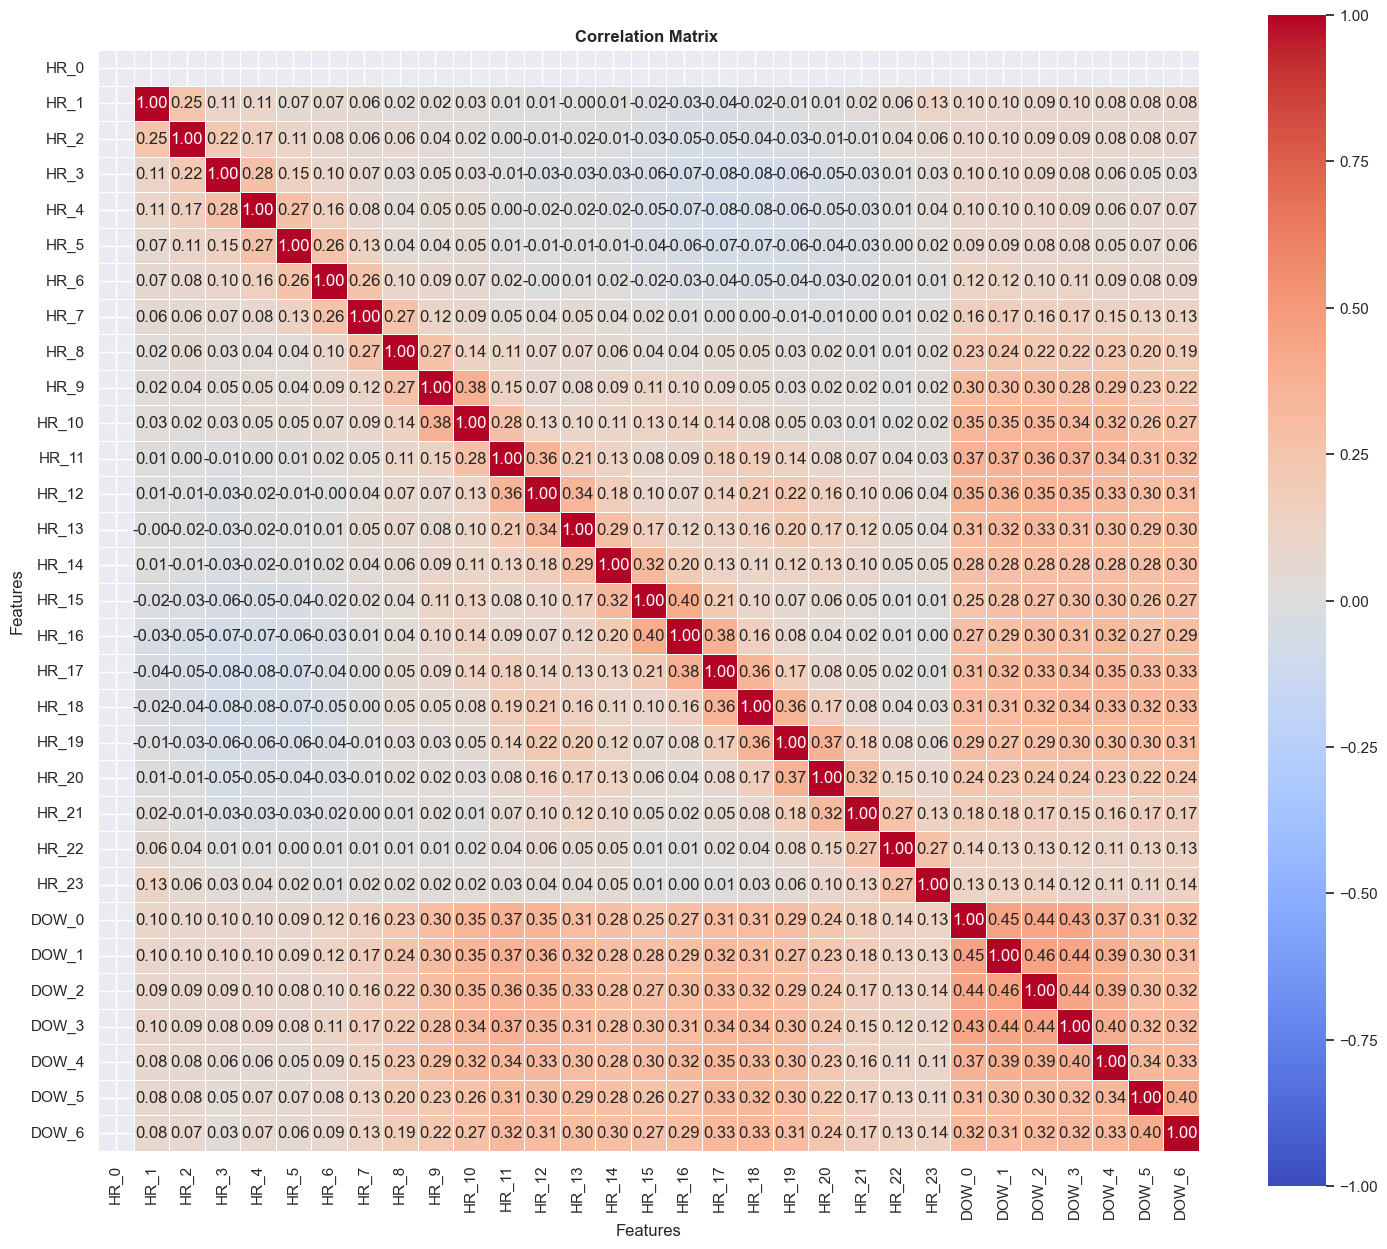

In [189]:
correlation_columns = ['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 
'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 
'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']


# Calculate the correlation matrix
correlation_matrix = df[correlation_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 15))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=.5, vmin=-1, vmax=1, center=0)

# Title and labels
plt.title('Correlation Matrix ', fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the heatmap
plt.tight_layout()
plt.show()

#### 5.8.5 Total Products ordered per customer city and age (Graph 20) ####

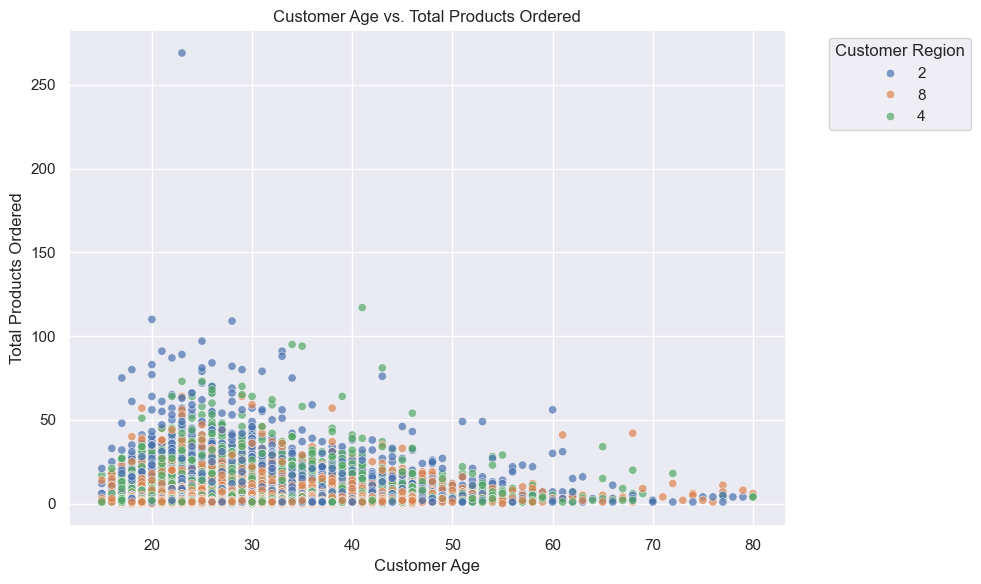

In [190]:
# Scatter plot to show the relationship between customer_age and product_count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='customer_age', y='product_count', hue='customer_city', alpha=0.7)
plt.title('Customer Age vs. Total Products Ordered')
plt.xlabel('Customer Age')
plt.ylabel('Total Products Ordered')
plt.legend(title='Customer Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
